<table>
    <tr style="background-color:white;">
        <td width="60%">
            <div style="height: 25px;"></div>
            <div align="left" style="color: #4b324e; font-size: 40px; font-weight: bold;">Taller de Qiskit</div>
        </td>
        <td>
            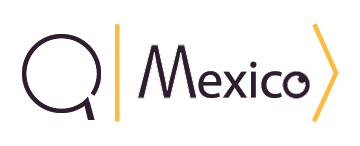
        </td>
    </tr>
</table>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $

<div align="center" style="color: #EE2A6F; font-size: 30px; font-weight: bold;">Visualizar Resultados de los Experimentos</div>

<div align="right" style="font-size: 15px; font-weight: normal;">Preparado por Claudia Zendejas-Morales</div>

<a href="https://opensource.org/licenses/Apache-2.0"></a>

# Contenido

1. [Introducción](#intro)
2. [Histograma](#secc1)
   1. [Ejemplo de 1 qubit](#secc1.1)
   2. [Ejemplo de 2 qubits: Estado de Bell](#secc1.2)
   3. [Ejemplo de 5 qubits](#secc1.3)
   4. [Opciones para un histograma](#secc1.4)
3. [Graficar un estado](#secc2)
   1. [Opciones para graficar un estado](#secc2.1)
   2. [Ejemplos de gráficas de estados](#secc2.2)
4. [Referencias](#secc3)

<a id="intro"></a>
# Introducción

Entender los resultados de un experimento es parte fundamental de cualquier proceso de estudio. Tener un conjunto de números, los resultados, muchas veces no es suficiente para entender que sucedió después de un experimento, es por ello que contar con la posibilidad de tener una manera gráfica de observar esos resultados, es muchas veces, esencial.

La visualización de datos es la representación gráfica de información y datos. Al utilizar elementos visuales como cuadros, gráficos y mapas, las herramientas de visualización de datos proporcionan una manera accesible de ver y comprender tendencias, valores atípicos y patrones.

Nuestros ojos son atraídos por los colores y patrones. Podemos identificar rápidamente el rojo del azul o el cuadrado del círculo. Nuestra cultura es visual, lo que incluye todo tipo de cosas, desde arte y publicidad hasta televisión y películas.

La visualización de datos es otra forma de arte visual que capta nuestro interés y mantiene nuestros ojos en el mensaje. Cuando vemos un gráfico, vemos rápidamente las tendencias y los valores atípicos. Si podemos ver algo, lo interiorizamos rápidamente. Es contar historias con un propósito. Si alguna vez haz visto una gigantesca hoja de cálculo de datos y no te fue posible ver una tendencia, sabes cuán eficaz puede ser una visualización.

Qiskit nos proporciona distintas maneras de graficar los resultados que obtenemos al ejecutar nuestros circuitos cuánticos, para ello primero debemos saber como aaceder a dicha información. En este notebook exploraremos esto con detalle.

<a id="secc1"></a>
# Histograma

Un histograma es una representación de la distribución de datos numéricos. Fue introducido por primera vez por [Karl Pearson](https://en.wikipedia.org/wiki/Karl_Pearson). Para construir un histograma, el primer paso es "agrupar" (o definir contenedores) de valores, es decir, dividir todo el rango de valores en una serie de intervalos, y luego contar cuántos valores caen en cada intervalo. Los contenedores generalmente se especifican como intervalos consecutivos no superpuestos de una variable. Los contenedores (intervalos) deben ser adyacentes y del mismo "ancho".

Los histogramas sirven para obtener una "primera vista" general de la distribución de la población (los datos) respecto a una característica cuantitativa. De esta manera ofrecen una visión de grupo permitiendo observar una preferencia, o tendencia, por parte de los datos por ubicarse hacia una determinada región de valores dentro del espectro de valores posibles que pueda adquirir la característica. Así pues, podemos evidenciar comportamientos, observar el grado de homogeneidad, acuerdo o coincidencia entre los valores de todas las partes que componen los datos, o, en contraposición, poder observar el grado de variabilidad, y por ende, la dispersión de todos los valores que toma la información. También es posible no evidenciar ninguna tendencia y obtener que cada miembro de la población toma por su lado y adquiere un valor de la característica aleatoriamente sin mostrar ninguna preferencia o tendencia, entre otras cosas.

En el caso de los resultados de un circuito cuántico, lo que esperamos obtener es uno de los posibles estados finales que surgirá después de ejecutar el circuito, de acuerdo a las compuertas aplicadas al estado inicial. Una manera de visualizar este resultado es con la ayuda de un histograma.

Pero, ¿por qué podemos crear un histograma si lo que estamos esperando es **un** estado final?. Debido a que los estados cuánticos son probabilísticos, es que tenemos cierta probabilidad de que un estado colapse en cierto valor o en otro, es por eso que al ejecutar un experimento (un circuito cuántico), lo hacemos **varias veces**, de tal forma que podamos obtener una estadística de los resultados y así conocer el comportamiento de nuestro experimento.

Veamos algunos ejemplos. Pero primero realicemos las importaciones necesarias.

In [1]:
# Importar módulos de Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import (plot_histogram, plot_state_city, plot_bloch_multivector, plot_bloch_vector,
                                        plot_state_paulivec, plot_state_hinton, plot_state_qsphere)

# actualmente la versión de matplotlib usada por Qiskit 0.28.0 muestra un mensaje de advertencia (deprecation), 
# lo suprimimos por comodidad
import warnings
warnings.filterwarnings("ignore")

<a id="secc1.1"></a>
## Ejemplo de 1 qubit

Comencemos analizando un circuito con un solo qubit, en este circuito aplicaremos la compuerta $H$, la cual provoca un estado de superposición, por lo que, si por ejemplo, le aplicamos esta compuerta al estado $\ket{0}$, entonces obtenemos:

$$H\ket{0}=\tfrac{1}{\sqrt{2}}\big(\ket{0}+\ket{1}\big)$$

El estado final no está ni en el polo norte de la esfera de Bloch (estado $\ket{0}$), ni en el polo sur de la misma (estado $\ket{1}$), sino en el eje x.

Veamos esto graficado en la esfera de Bloch, pero primero debemos crear el circuito que nos lleva del estado inicial $\ket{0}$ al estado final $\tfrac{1}{\sqrt{2}}\big(\ket{0}+\ket{1}\big)$:

In [2]:
# Crear un simulador
simulator = Aer.get_backend('aer_simulator')    # debemos crear el simulador de backend antes que el circuito
                                                # porque sino la función 'save_statevector()' no estará disponible
                                                # al crear el backend se adjunta dicha instrucción al QuantumCircuit

In [3]:
circ = QuantumCircuit(1)                        # circuito con 1 registro cuántico
circ.save_statevector(label=f'Estado inicial')  # guardamos el estado inicial
circ.h(0)                                       # aplicamos la compuerta H
circ.save_statevector(label=f'Estado final')    # guardamos el estado final

# ejecutar el circuito (nuestro experimento)
result = simulator.run(circ).result()

# obtenemos los estados guardados
data = result.data(0)
data

{'Estado inicial': array([1.+0.j, 0.+0.j]),
 'Estado final': array([0.70710678+0.j, 0.70710678+0.j])}

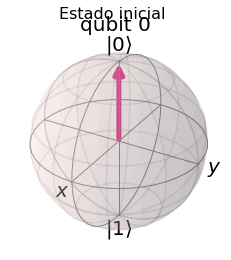

In [4]:
# veamos el estado inicial
plot_bloch_multivector(data.get('Estado inicial'), 'Estado inicial')

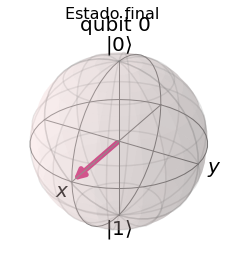

In [5]:
# veamos el estado final
plot_bloch_multivector(data.get('Estado final'), 'Estado final')

Como puedes ver, el estado final no está ni en $\ket{0}$ ni en $\ket{1}$, por lo que cuando le pedimos que colapse (hacemos una medición), algunas veces colapsará en $\ket{0}$ y otras veces en $\ket{1}$. Pero ¿cuántas veces en cada caso?. Debido a que el estado final está balanceado, ambas opciones tienen la misma probabilidad (de $\tfrac{1}{2}$), entonces esperamos que la mitad de las veces colapse en $\ket{0}$ y la otra mitad en $\ket{1}$.

Si ejecutamos el experimento solo una vez, entonces es como cuando lanzamos una moneda al aire, o saldrá cara (estado $\ket{0}$) o saldrá cruz (estado $\ket{1}$). Por lo que nos conviene ejecutar varias veces el experimento, de esta forma comprobamos que en efecto el $50\%$ de las veces obtendremos $\ket{0}$ y el otro $50\%$ de las veces obtendremos $\ket{1}$. 

Para ello usamos el parámetro `shots` del método `run()`, este parámetro tiene un valor por defecto de `1024`, por lo que si no lo especificas esa es la cantidad de veces que se ejecutará tu circuito, veámoslo:

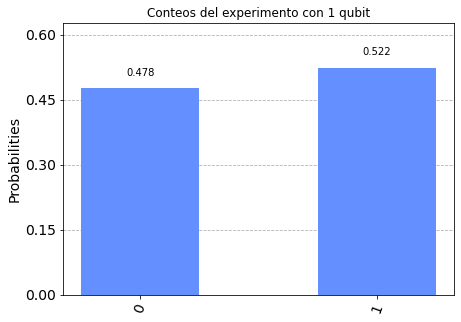

In [6]:
circ = QuantumCircuit(1)                        # circuito con 1 registro cuántico
circ.h(0)

# debemos agregar la medición para que podamos tener los conteos
circ.measure_all()

# Ejecutar el circuito en el simulador (aquí se está usando shots=1024)
result = simulator.run(circ).result()

# obtener los conteos de la ejecución (cuántas veces salió cada estado)
counts = result.get_counts(circ)

# graficar los resultados en un histograma
plot_histogram(counts, title='Conteos del experimento con 1 qubit')

Qiskit se encarga de mostrar los resultados en forma de probailidades, entonces en el histograma anterior, cada barra tiene un número que al sumar ambos nos da $1.0$, es decir el $100\%$. Nota que estos números cambiarán cada vez que se ejecute la celda.

Pero, ¿en dónde se ve que de verdad se ejecutó $1024$ veces?, para ello podemos inspeccionar el diccionario de conteos:

In [7]:
counts

{'0': 489, '1': 535}

La suma de las veces que salió $0$ más las veces que salió $1$ es igual a $1024$.

Por su puesto tu puedes decidir cuántas veces ejecutar un experimento, para ello especifica el  valor de `shots`:

{'1': 4029, '0': 4095}


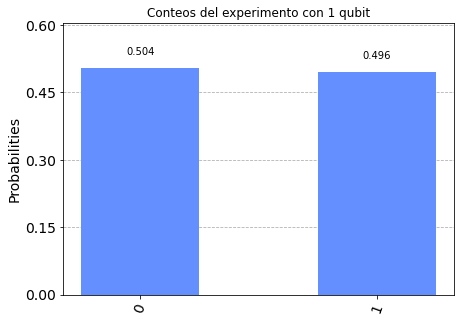

In [8]:
circ = QuantumCircuit(1)                        # circuito con 1 registro cuántico
circ.h(0)

# debemos agregar la medición para que podamos tener los conteos
circ.measure_all()

# Ejecutar el circuito en el simulador (aquí se está usando shots=8124)
result = simulator.run(circ, shots=8124).result()

# obtener los conteos de la ejecución (cuántas veces salió cada estado)
counts = result.get_counts(circ)

# imprimimos el diccionario de conteos
print(counts)

# graficar los resultados en un histograma
plot_histogram(counts, title='Conteos del experimento con 1 qubit')

Un histograma con dos posibles valores no es muy interesante, no representa una ganancia por sobre el diccionario de conteos, son tan pocos datos que con el diccionario es suficiente para entender qué está pasando. Veamos un par de ejemplos para entender el valor que el histograma nos proporciona.

<a id="secc1.2"></a>
## Ejemplo de 2 qubits: Estado de Bell

Uno de los [estados de Bell](https://en.wikipedia.org/wiki/Bell_state) es:

$$\ket{\Phi^+}=\frac{1}{2}\Big(\ket{00}+\ket{11}\Big)$$

Veamos su histograma:

{'11': 5165, '00': 5075}


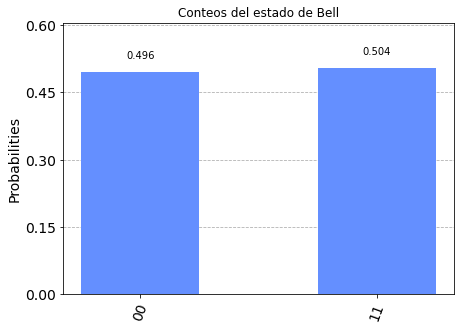

In [9]:
# Crear el circuito
bell = QuantumCircuit(2)     # 2 qubits
bell.h(0)                    # compuerta H en el primer qubit
bell.cx(0, 1)                # compuerta CNOT, con control en el primer qubit y objetivo en el segundo
bell.measure_all()           # medir todos los qubits

# Ejecutar el circuito en el simulador con muchos shots (o repeticiones)
result = simulator.run(bell, shots = 10240).result()

# obtener los conteos de la ejecución
counts_bell = result.get_counts(bell)

# imprimir el diccionario de conteos
print(counts_bell)

# graficar los resultados en un histograma
plot_histogram(counts_bell, title='Conteos del estado de Bell')

En este ejemplo colocamos una gran cantidad de iteraciones (`shots = 10240`), lo que provoca esto es que las probabilidades de las dos opciones posibles para el estado final son realmente muy cercanas al $50\%$, ejecuta la celda anterior varias veces y comprueba que casi no cambian los valores entre ejecuciones.

Notemos que el histograma solamente está mostrando 2 estados finales, cuando al tratarse de un estado de 2 qubits, deberían existir 4 posibles estados finales. Qiskit se encarga de no mostrar aquellos estados que tienen conteos en cero, por eso solamente vemos dos barras en el histograma, un estado de Bell siempre tendrá 2 posibles estados finales (siempre y cuando estemos realizando una ejecución sin _ruido_, más detalles al respecto en notebooks posteriores).

<a id="secc1.3"></a>
## Ejemplo de 5 qubits

Generemos ahora un circuito con $5$ qubits, apliquémosle algunas compuertas y observemos su histograma.

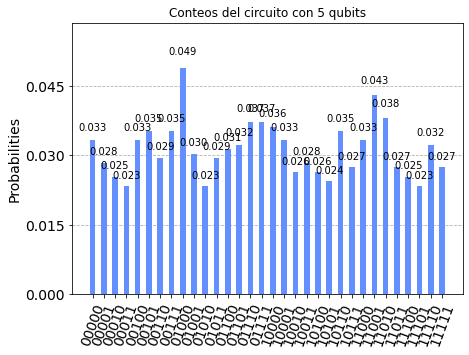

In [10]:
# Crear el circuito
circ5 = QuantumCircuit(5)     # 5 qubits
circ5.h(range(5))             # compuerta H en todos los qubits
circ5.cz(0, 1)                # compuerta Control-Z, con control en el primer qubit y objetivo en el segundo
circ5.cz(1, 2) 
circ5.cz(2, 3) 
circ5.cz(3, 4) 
circ5.measure_all()           # medir todos los qubits

# Ejecutar el circuito en el simulador con no tantos shots (o repeticiones), pues es un circuito más grande
result = simulator.run(circ5, shots = 1024).result()

# obtener los conteos de la ejecución
counts = result.get_counts(circ5)

# graficar los resultados en un histograma
plot_histogram(counts, title='Conteos del circuito con 5 qubits')

Como se trata de un circuito de $5$ qubits, tenemos $2^5 = 32$ posibles estados finales, a los cuales se les puede observar sus probabilidades en el histograma anterior. En particular este circuito no está diseñado para resolver algún problema específico, pero si lo estuviera, podrías interpretar los resultados con mayor facilidad que simplemente ver el diccionario de conteos:

In [11]:
counts

{'01100': 32,
 '10000': 37,
 '01001': 31,
 '11001': 44,
 '10110': 36,
 '11111': 28,
 '01101': 33,
 '11101': 24,
 '00010': 26,
 '01000': 50,
 '11110': 33,
 '00001': 29,
 '10111': 28,
 '11000': 34,
 '10001': 34,
 '00000': 34,
 '11011': 28,
 '01110': 38,
 '01011': 30,
 '00110': 30,
 '10100': 27,
 '00111': 36,
 '00011': 24,
 '11010': 39,
 '10010': 27,
 '10011': 29,
 '00101': 36,
 '01010': 24,
 '00100': 34,
 '10101': 25,
 '01111': 38,
 '11100': 26}

<a id="secc1.4"></a>
## Opciones para un histograma

`plot_histogram()` tiene algunas opciones para ajustar la salida. La primera opción es el [_kwarg_](https://book.pythontips.com/en/latest/args_and_kwargs.html) `legend`, el cual se utiliza para proporcionar una etiqueta a las ejecuciones; es necesario indicar una lista de cadenas que se utilizan para etiquetar los resultados de cada ejecución. Esto es sobre todo útil cuando se trazan varios resultados de ejecución en el mismo histograma.

El _kwarg_ `sort` se usa para ajustar el orden en que se representan las barras en el histograma. Se puede configurar en orden ascendente con `asc` o en orden descendente con `desc`. El _kwarg_ `number_to_keep` toma un número entero que indica el número de términos a mostrar, el resto se agrupa en una sola barra llamada "rest". 

Puedes ajustar el color de las barras con el _kwarg_ `color` que toma una cadena o una lista de cadenas para los colores que se utilizarán para las barras para cada ejecución. Puedes ajustar si las etiquetas se imprimen encima de las barras o no con el _kwarg_ `bar_labels`. La última opción disponible es el _kwarg_ `figsize` que toma una tupla con el tamaño en pulgadas para la figura de salida.

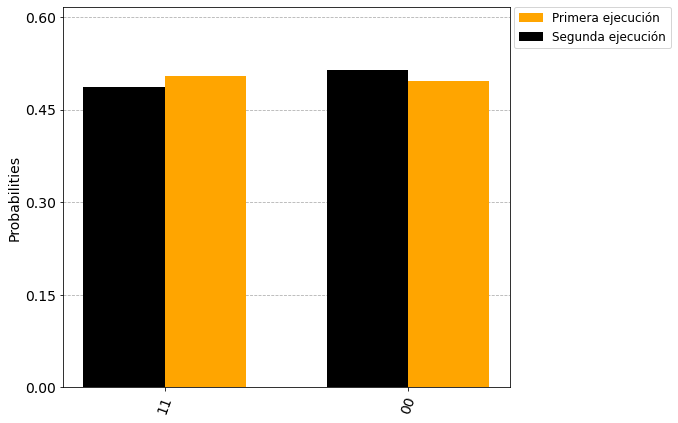

In [12]:
# ejecutar el estado Bell de 2 qubits nuevamente
second_result = simulator.run(bell, shots = 512).result()

# obtener conteos
second_counts  = second_result.get_counts(bell)

# mostrar los resultados con su leyenda
legend = ['Primera ejecución', 'Segunda ejecución']

# podemos indicarle uno o varios diccionarios de conteos, en este ejemplo son 2 diccionarios, 
# de ahí que se muestren dos histogramas juntos
datos = [counts_bell, second_counts]

# personalizar el histograma
plot_histogram(datos, legend=legend, sort='desc', figsize=(8,7),
               color=['orange', 'black'], bar_labels=False)

<a id="secc2"></a>
# Graficar un estado

En muchas situaciones, lo que deseamos es ver el estado de un experimento, ya sea en algún punto intermedio o al finalizar la ejecución del circuito cuántico. Esto podría ser para depurar, por ejemplo. El objetivo es visualizar el estado cuántico. Hay varias funciones para generar diferentes tipos de visualización de un estado cuántico.

<div class="alert alert-block alert-danger">

Graficar el estado de un experimento, requiere recursos exponenciales, por lo que recomendamos ver solo el estado de los sistemas cuánticos pequeños.
    
</div>

Un estado cuántico es una matriz de estados $\rho$ (o [matriz de densidad](https://en.wikipedia.org/wiki/Density_matrix)), que es una [matriz Hermitiana](https://es.wikipedia.org/wiki/Matriz_hermitiana), o un vector de estados $\ket{\psi}$ (vector complejo). La matriz de estado está relacionada con el vector de estado por,

$$\rho=\ket{\psi}\bra{\psi}$$

y de forma más general, ya que puede representar [estados mixtos](https://es.wikipedia.org/wiki/Estado_mixto) (suma positiva de vectores de estado), por,

$$\rho=\sum_{k}\;p_k\;\ket{\psi_k}\bra{\psi_k}$$

Las posibles visualizaciones que podemos usar son:

- `plot_state_city`: La vista estándar para estados cuánticos donde las partes real e imaginaria de la matriz del estado se trazan separadas y se dibujan como una "ciudad", esto es, cada elemento de la matriz será una barra en 3 dimensiones, lo que asemeja edificios.
- `plot_state_qsphere`: Esta es la vista única de Qiskit de un estado cuántico donde la amplitud y la fase del vector de estado se trazan en una esfera. La amplitud es el grosor de la flecha y la fase es el color. Para estados mixtos, mostrará una `qsphere` diferente para cada componente.
- `plot_state_paulivec`: La representación de la matriz de estados utilizando [operadores de Pauli](https://en.wikipedia.org/wiki/Pauli_matrices) como base.
- `plot_state_hinton`: Grafica un [diagrama de Hinton](https://matplotlib.org/stable/gallery/specialty_plots/hinton_demo.html) para la matriz de densidad de un estado cuántico.
- `plot_bloch_multivector`: La proyección del estado cuántico en el espacio de un solo qubit en una esfera de Bloch.
- `plot_bloch_vector`: Como el anterior, pero espacíficamente para un solo quibit.

<a id="secc2.1"></a>
## Opciones para graficar un estado

Las diversas funciones para trazar estados cuánticos proporcionan una serie de opciones para ajustar la forma en que se muestra las gráficas. Las opciones disponibles dependen de la función que se esté utilizando.

- `plot_state_city`
  - **title** (str): cadena con el título de la gráfica
  - **figsize** (tuple): tupla con el tamaño de la figura en pulgadas (ancho, alto)
  - **color** (list): lista de tamaño 2 que indica los colores de los componentes de la parte real y de la imaginaria
- `plot_state_qsphere`
  - **figsize** (tuple)
- `plot_state_paulivec`
  - **title** (str)
  - **figsize** (tuple)
  - **color** (list or str): color de la barras
- `plot_state_hinton`
  - **title** (str)
  - **figsize** (tuple)
- `plot_bloch_multivector`
  - **title** (str)
  - **figsize** (tuple)
- `plot_bloch_vector`
  - **title** (str)
  - **figsize** (tuple)

<a id="secc2.2"></a>
## Ejemplos de gráficas de estados

Ahora veamos cómo aplicar las distintas formas de graficar los estados cuánticos. Para esto tomaremos el ejemplo del estado de Bell.

In [13]:
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
# guardamos el vector de estado
bell.save_statevector()

# ejecutamos el circuito
result = simulator.run(bell).result()

# solicitamos el vector de estado
phi = result.get_statevector(bell)

phi

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

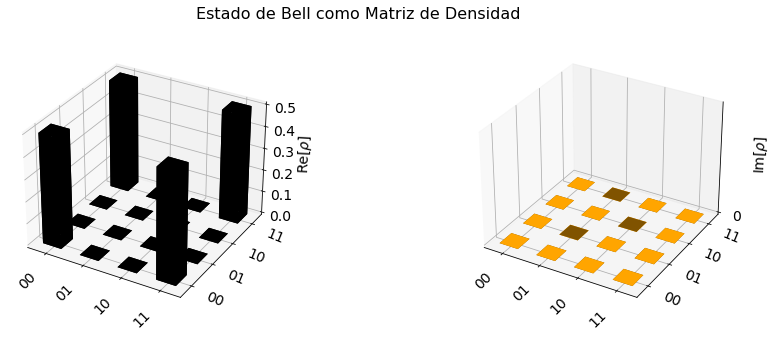

In [14]:
plot_state_city(phi, title="Estado de Bell como Matriz de Densidad", color=['black', 'orange'])

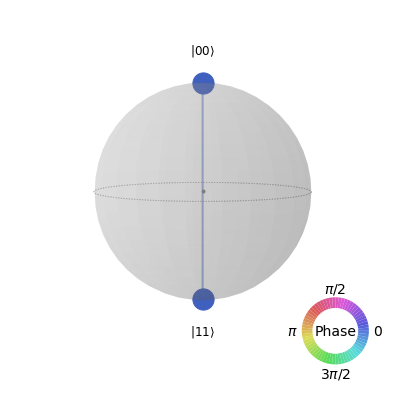

In [15]:
plot_state_qsphere(phi)

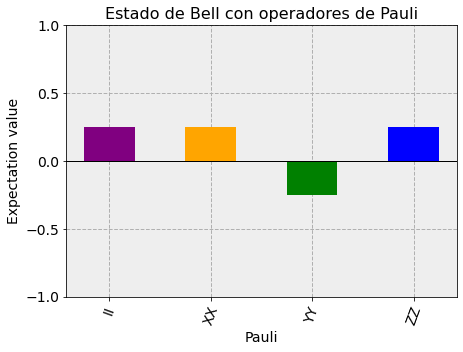

In [16]:
plot_state_paulivec(phi, title="Estado de Bell con operadores de Pauli", color=['purple', 'orange', 'green', 'blue'])

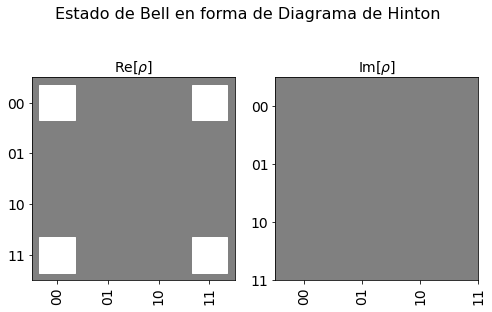

In [17]:
plot_state_hinton(phi, title="Estado de Bell en forma de Diagrama de Hinton")

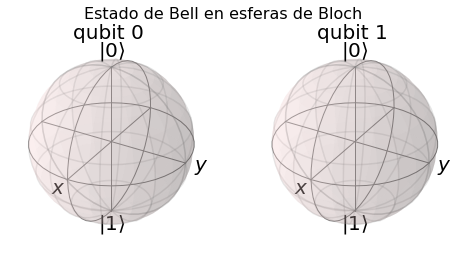

In [18]:
plot_bloch_multivector(phi, title="Estado de Bell en esferas de Bloch")

Notemos que para el estado de Bell no se aprecian vectores de sus dos qubits en sus esferas de Bloch correspondientes, esto es debido a que los qubits de los estados de Bell están entrelazados, es decir, este estado no se puede escribir como dos estados separados, esto también significa que perdemos información cuando intentamos graficar nuestro estado en esferas de Bloch separadas.

Para estos casos es preferible usar la QSphere, graficada más arriba.

Para el caso de estados de un sólo qubit, se puede usar `plot_bloch_vector`, que es una forma estándar de graficar un sistema cuántico, toma como entrada el vector de Bloch.

El vector de Bloch se define como $\Big[x = Tr[X\rho], y = Tr[Y\rho], z = Tr[Z\rho]\Big]$, donde $X$, $Y$ y $Z$ son los operadores de Pauli para un solo qubit y $\rho$ es la matriz de densidad.

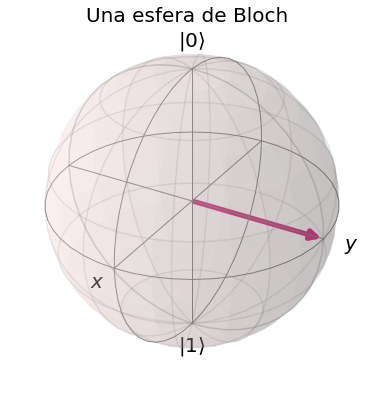

In [19]:
plot_bloch_vector([0,1,0], title='Una esfera de Bloch')

<a id="secc3"></a>
# Referencias

- [1] Tableau. Guía de visualización de datos para principiantes: definición, ejemplos y recursos de aprendizaje. Consultado en: https://www.tableau.com/es-mx/learn/articles/data-visualization
- [2] Histograma. Consultado en: https://es.wikipedia.org/wiki/Histograma
- [3] Qiskit Development Team. Qiskit Visualizations. Consultado en: https://qiskit.org/documentation/tutorials/circuits/2_plotting_data_in_qiskit.html
- [4] Matplotlib. Hinton diagrams. Consultado en: https://matplotlib.org/stable/gallery/specialty_plots/hinton_demo.html
- [5] Python Tips. args and kwargs. Consultado en: https://book.pythontips.com/en/latest/args_and_kwargs.html

<table width="100%">
    <tr style="background-color:white;">
        <td>
            <div style="text-align: left;">
            <a href="01_Simuladores.ipynb" style="color: #EE2A6F; font-size: 15px; font-weight: normal;">
                &lt;&lt; Notebook anterior: 01_Simuladores
            </a>
            </div>
        </td>
        <td>
            <div style="text-align: right;">
            <a href="03_Dispositivo_Real.ipynb" style="color: #EE2A6F; font-size: 15px; font-weight: normal;">
                Notebook siguiente: 03_Dispositivo_Real >>
            </a>
            </div>
        </td>
    </tr>
</table>